#First tut

In [ ]:
import torch

In [ ]:
x=torch.empty(2,3)
x

tensor([[1.6816e-44, 4.3631e-41, 4.4593e-28],
        [0.0000e+00, 1.5512e-42, 4.3631e-41]])

In [ ]:
x=torch.rand(2,2)
print(x)

tensor([[0.6950, 0.0949],
        [0.9550, 0.8082]])


In [ ]:
x=torch.zeros(2,2)
print(x)

tensor([[0., 0.],
        [0., 0.]])


In [ ]:
x=torch.ones(2,2)
print(x)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
x=torch.ones(2,2,dtype=torch.float16)
print(x.size())

torch.Size([2, 2])


In [ ]:
x=torch.tensor([2.5,0.1])
print(x)

tensor([2.5000, 0.1000])


In [ ]:
x=torch.rand(2,2)
y=torch.rand(2,2)
print(x)
print(y)
z=x*y
z=torch.add(x,y)
print(z)

tensor([[0.8580, 0.5012],
        [0.0898, 0.9346]])
tensor([[0.3725, 0.1677],
        [0.7597, 0.9135]])
tensor([[1.2305, 0.6690],
        [0.8495, 1.8481]])


In [ ]:
y.add_(x)
print(y)#inplace

tensor([[1.2305, 0.6690],
        [0.8495, 1.8481]])


In [ ]:
z=x-y
z=torch.sub(x,y)
print(z)

tensor([[-0.3725, -0.1677],
        [-0.7597, -0.9135]])


In [ ]:
z=x-y
z=torch.mul(x,y)#elementwise multiplication
print(z)

tensor([[1.0557, 0.3353],
        [0.0763, 1.7273]])


In [ ]:
z=torch.div(x,y)#elementwise
print(z)

tensor([[0.6972, 0.7493],
        [0.1057, 0.5057]])


In [ ]:
x=torch.rand(5,3)
print(x)
print(x[:,0])
print(x[1,1])
print(x[1,1].item())

tensor([[0.2579, 0.5842, 0.9500],
        [0.4426, 0.8940, 0.1085],
        [0.7387, 0.6834, 0.9880],
        [0.3765, 0.4051, 0.9860],
        [0.7920, 0.4026, 0.4235]])
tensor([0.2579, 0.4426, 0.7387, 0.3765, 0.7920])
tensor(0.8940)
0.893976092338562


In [ ]:
x=torch.rand(4,4)
print(x)
y=x.view(16)
print(y)
y=x.view(-1,8)#-1 automatic
print(y)

tensor([[0.3095, 0.0192, 0.0435, 0.3550],
        [0.4429, 0.1971, 0.6478, 0.6121],
        [0.2224, 0.7938, 0.3916, 0.7702],
        [0.3569, 0.7788, 0.7128, 0.1018]])
tensor([0.3095, 0.0192, 0.0435, 0.3550, 0.4429, 0.1971, 0.6478, 0.6121, 0.2224,
        0.7938, 0.3916, 0.7702, 0.3569, 0.7788, 0.7128, 0.1018])
tensor([[0.3095, 0.0192, 0.0435, 0.3550, 0.4429, 0.1971, 0.6478, 0.6121],
        [0.2224, 0.7938, 0.3916, 0.7702, 0.3569, 0.7788, 0.7128, 0.1018]])


In [ ]:
import torch
import numpy as np


In [ ]:
a=torch.ones(5)
print(a)
b=a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [ ]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
a=np.ones(5)
print(a)
b=torch.from_numpy(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
a+=1
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
if torch.cuda.is_available():
  device=torch.device("cuda")
  x=torch.ones(5,device=device)
  y=torch.ones(5)
  y=y.to(device)
  z=x+y
  # print(z)
  z=z.to("cpu")
  print(z)

tensor([2., 2., 2., 2., 2.])


In [ ]:
torch.cuda.is_available()

True

In [ ]:
x=torch.ones(5,requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


# Second Tut

In [ ]:
import torch
x=torch.randn(3,requires_grad=True)
print(x)


tensor([-0.1559,  0.5050, -0.4446], requires_grad=True)


In [ ]:
y=x+2
print(y)
z=y*y*2
print(z)
z=z.mean()
print(z)
z.backward() #dz/dx
print(x.grad)

tensor([1.8441, 2.5050, 1.5554], grad_fn=<AddBackward0>)
tensor([ 6.8017, 12.5497,  4.8383], grad_fn=<MulBackward0>)
tensor(8.0632, grad_fn=<MeanBackward0>)
tensor([2.4588, 3.3400, 2.0738])


In [ ]:
z=y*y*2
v=torch.tensor([0.1,1.0,0.01],dtype=torch.float32)
z.backward(v)
print(x.grad)

tensor([ 3.1965, 13.3598,  2.1360])


In [ ]:
x.requires_grad_(False)
print(x)

tensor([-0.1559,  0.5050, -0.4446])


In [ ]:
y=x.detach()
print(y)

tensor([-0.1559,  0.5050, -0.4446])


In [ ]:
with torch.no_grad():
  y=x+2
  print(y)

tensor([1.8441, 2.5050, 1.5554])


In [ ]:
weights=torch.ones(4,requires_grad=True)

for epoch in range(3):
  model_output=(weights*3).sum()
  model_output.backward()

  print(weights.grad)
  # weights.grad.zero_()


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


# Backpropagation Theory

In [ ]:
import torch
x=torch.tensor(1.0)
y=torch.tensor(2.0)

w=torch.tensor(1.0,requires_grad=True)

y_hat=w*x
loss=(y_hat-y)**2
print(loss)
loss.backward()
print(w.grad)
#backward pass above
#update weights
#next forward and backward pass

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


#Gradientg Descent with AutoGrad and Bakckprop

In [ ]:
import numpy as np

#f=w*x
#f=2*x

X=np.array([1,2,3,4],dtype=np.float32)
Y=np.array([2,4,6,8],dtype=np.float32)

w=0.0

#model prediction
def forward(x):
  return w * x

# loss - MSE

def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
#MSE =1/N *(w*x-y)**2
#dj/dx=1/N 2x(w*x-y)

def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()


print("Predictions before training:" +str(forward(5)))

#Training
learning_rate=0.01
n_iters=10

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  dw=gradient(X,Y,y_pred)

  #update weights
  w-=learning_rate*dw
  if epoch%2 ==0:
    print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print("Predictions after training:" +str(forward(5)))


Predictions before training:0.0
epoch 1: w=1.200, loss=30.00000000
epoch 3: w=1.872, loss=0.76800019
epoch 5: w=1.980, loss=0.01966083
epoch 7: w=1.997, loss=0.00050332
epoch 9: w=1.999, loss=0.00001288
Predictions after training:9.998952


In [ ]:
import torch
#f=w*x
#f=2*x

X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction
def forward(x):
  return w * x

# loss - MSE

def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
#MSE =1/N *(w*x-y)**2
#dj/dx=1/N 2x(w*x-y)

def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()


print("Predictions before training:" +str(forward(5)))

#Training
learning_rate=0.01
n_iters=100

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  with torch.no_grad():
    w-=learning_rate*w.grad
  w.grad.zero_()
  if epoch%10 ==0:
    print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print("Predictions after training:" +str(forward(5)))


Predictions before training:tensor(0., grad_fn=<MulBackward0>)
epoch 1: w=0.300, loss=30.00000000
epoch 11: w=1.665, loss=1.16278565
epoch 21: w=1.934, loss=0.04506890
epoch 31: w=1.987, loss=0.00174685
epoch 41: w=1.997, loss=0.00006770
epoch 51: w=1.999, loss=0.00000262
epoch 61: w=2.000, loss=0.00000010
epoch 71: w=2.000, loss=0.00000000
epoch 81: w=2.000, loss=0.00000000
epoch 91: w=2.000, loss=0.00000000
Predictions after training:tensor(10.0000, grad_fn=<MulBackward0>)


#Pytorch Loss and Optimizer

In [ ]:
#1 Design model,input and output size ,forward pass
#2 Construct loss and optimizer
#3 Training oss
# - forwards pass: compute Prediction
# - backward pass: gradients
# - update weights


import torch
import torch.nn as nn
#f=w*x
#f=2*x

X=torch.tensor([1,2,3,4],dtype=torch.float32)
Y=torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction
def forward(x):
  return w * x

# loss - MSE



# gradient
#MSE =1/N *(w*x-y)**2
#dj/dx=1/N 2x(w*x-y)

def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()


print("Predictions before training:" +str(forward(5)))

#Training
learning_rate=0.01
n_iters=100

losee=nn.MSELoss()
optimizer=torch.optim.SGD([w],lr=learning_rate)

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=forward(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 ==0:
    print(f'epoch {epoch+1}: w={w:.3f}, loss={l:.8f}')

print("Predictions after training:" +str(forward(5)))


Predictions before training:tensor(0., grad_fn=<MulBackward0>)
epoch 1: w=0.300, loss=30.00000000
epoch 11: w=1.665, loss=1.16278565
epoch 21: w=1.934, loss=0.04506890
epoch 31: w=1.987, loss=0.00174685
epoch 41: w=1.997, loss=0.00006770
epoch 51: w=1.999, loss=0.00000262
epoch 61: w=2.000, loss=0.00000010
epoch 71: w=2.000, loss=0.00000000
epoch 81: w=2.000, loss=0.00000000
epoch 91: w=2.000, loss=0.00000000
Predictions after training:tensor(10.0000, grad_fn=<MulBackward0>)


In [ ]:
#1 Design model,input and output size ,forward pass
#2 Construct loss and optimizer
#3 Training oss
# - forwards pass: compute Prediction
# - backward pass: gradients
# - update weights


import torch
import torch.nn as nn
#f=w*x
#f=2*x

X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test=torch.tensor([5],dtype=torch.float32)

n_samples,n_features=X.shape
print(n_samples,n_features)
input_size=n_features
output_size=n_features

#model=nn.Linear(input_size,output_size)
model=nn.Linear(input_size,output_size)


print("Predictions before training:" +str(model(X_test).item()))

#Training
learning_rate=0.01
n_iters=100

losee=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=model(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 ==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w={w[0][0].item():.3f}, loss={l:.8f}')

print("Predictions after training:" +str(model(X_test).item()))


4 1
Predictions before training:0.9409337043762207
epoch 1: w=0.270, loss=21.70866013
epoch 11: w=1.343, loss=0.85331571
epoch 21: w=1.526, loss=0.29676181
epoch 31: w=1.567, loss=0.26637435
epoch 41: w=1.584, loss=0.25053054
epoch 51: w=1.597, loss=0.23593962
epoch 61: w=1.609, loss=0.22220656
epoch 71: w=1.620, loss=0.20927308
epoch 81: w=1.632, loss=0.19709229
epoch 91: w=1.643, loss=0.18562056
Predictions after training:9.283207893371582


In [ ]:
#1 Design model,input and output size ,forward pass
#2 Construct loss and optimizer
#3 Training oss
# - forwards pass: compute Prediction
# - backward pass: gradients
# - update weights


import torch
import torch.nn as nn
#f=w*x
#f=2*x

X=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test=torch.tensor([5],dtype=torch.float32)

n_samples,n_features=X.shape
print(n_samples,n_features)
input_size=n_features
output_size=n_features

#model=nn.Linear(input_size,output_size)
# model=nn.Linear(input_size,output_size)


# 1 Design model, input and output size, forward pass
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):  # Corrected: __init__ not _init_
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)


model = LinearRegression(input_size, output_size)


print("Predictions before training:" +str(model(X_test).item()))

#Training
learning_rate=0.01
n_iters=100

losee=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
  #predictions=forward pass
  y_pred=model(X)

  #loss
  l=loss(Y,y_pred)

  #gradients
  l.backward()

  #update weights
  optimizer.step()
  optimizer.zero_grad()

  if epoch%10 ==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w={w[0][0].item():.3f}, loss={l:.8f}')

print("Predictions after training:" +str(model(X_test).item()))


4 1
Predictions before training:-3.40451717376709
epoch 1: w=-0.383, loss=51.42938995
epoch 11: w=1.268, loss=1.57779241
epoch 21: w=1.544, loss=0.27362490
epoch 31: w=1.598, loss=0.22633247
epoch 41: w=1.616, loss=0.21234727
epoch 51: w=1.629, loss=0.19996659
epoch 61: w=1.640, loss=0.18832690
epoch 71: w=1.651, loss=0.17736535
epoch 81: w=1.661, loss=0.16704182
epoch 91: w=1.671, loss=0.15731907
Predictions after training:9.34011173248291


#Linear Regression using Pytorch

epoch 1: w=1.256, loss=5735.5908
epoch 11: w=13.201, loss=4250.7607
epoch 21: w=23.380, loss=3176.5378
epoch 31: w=32.056, loss=2398.5393
epoch 41: w=39.451, loss=1834.5172
epoch 51: w=45.757, loss=1425.2428
epoch 61: w=51.134, loss=1128.0068
epoch 71: w=55.721, loss=911.9692
epoch 81: w=59.633, loss=754.8354
epoch 91: w=62.972, loss=640.4691


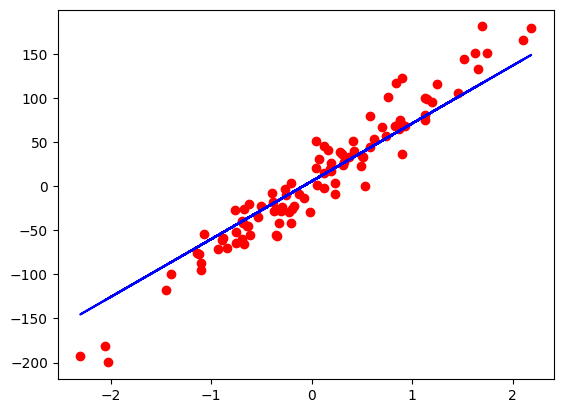

In [ ]:
#1 Design (input size,output size,forward pass)
#2 Construct loss and optimizer
#3 Training Loop
    # -forward pass: compute predictions and loss
    # -backward pass: gradients
    # -update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

x_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X=torch.from_numpy(x_numpy.astype(np.float32))
Y=torch.from_numpy(y_numpy.astype(np.float32))
Y=Y.view(Y.shape[0],1)
n_samples,n_features=X.shape
#Model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)
criteria=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

#Training
num_epochs=100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted=model(X)
  loss=criteria(y_predicted,Y)
  #backward pass
  loss.backward()
  #update
  optimizer.step()
  #empty gradients
  optimizer.zero_grad()

  if epoch%10==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w={w[0][0].item():.3f}, loss={loss:.4f}')

 #plot
predicted=model(X).detach().numpy()
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()




#Logistic Regression using Pytorch

In [ ]:
#1 Design (input size,output size,forward pass)
#2 Construct loss and optimizer
#3 Training Loop
    # -forward pass: compute predictions and loss
    # -backward pass: gradients
    # -update weights
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

bc=datasets.load_breast_cancer()
X,y=bc.data,bc.target

n_samples,n_features=X.shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=torch.from_numpy(X_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
y_train=torch.from_numpy(y_train.astype(np.float32))
y_test=torch.from_numpy(y_test.astype(np.float32))
y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

#f=wx+b,sigmoid at the end
class LogisticRegression(nn.Module):
  def __init__(self,n_input_features):
    super(LogisticRegression,self).__init__()
    self.linear=nn.Linear(n_input_features,1)

  def forward(self,x):
    y_predicted=torch.sigmoid(self.linear(x))
    return y_predicted

#Model
model=LogisticRegression(n_features)
#Loss and Optimizer
criteria=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

#Training
num_epochs=100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted=model(X_train)
  loss=criteria(y_predicted,y_train)
  #backward pass
  loss.backward()
  #update
  optimizer.step()
  #empty gradients
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: loss={loss:.4f}')

with torch.no_grad():
  y_predicted=model(X_test)
  y_predicted_cls=y_predicted.round()
  acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy={acc:.4f}')




epoch 10: loss=0.5298
epoch 20: loss=0.4521
epoch 30: loss=0.3992
epoch 40: loss=0.3607
epoch 50: loss=0.3313
epoch 60: loss=0.3079
epoch 70: loss=0.2888
epoch 80: loss=0.2729
epoch 90: loss=0.2593
epoch 100: loss=0.2475
accuracy=0.9211


#Dataset and DataLoader

In [ ]:
'''
epoch = 1 forward and backward pass of ALL training samples
batch_size= number of training sample in one forward and backward pass
number of iterations = number of passes,each pass using[batch_size] number of samples
e.g 100 samples,batch_size=20 -->100/20=5 iterations for 1 epoch
'''

import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self):
    #data loading
    xy= np.loadtxt('/content/WineQT.csv',delimiter=",",dtype=np.float32,skiprows=1)
    self.x=torch.from_numpy(xy[:,1:])
    self.y=torch.from_numpy(xy[:,[0]])
    self.n_samples=xy.shape[0]

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.n_samples


dataset = WineDataset()
# first_data = dataset[0]
# features,labels = first_data
# print(features,labels)

dataloader=DataLoader(dataset=dataset,batch_size=4,shuffle=True,num_workers=2)
datatiter=iter(dataloader)
data=next(datatiter)
features,labels=data
print(features,labels)


#training loop
num_epochs=2
total_samples=len(dataset)
n_iterations=math.ceil(total_samples/4)
print(total_samples,n_iterations)
for epoch in range(num_epochs):
  for i,(inputs,labels) in enumerate(dataloader):
     # forward and backward,update (placeholders for actual model logic)

     # --- ADDED CONDITION HERE TO MATCH VIDEO'S PRINT FREQUENCY ---
     if (i + 1) % 5 == 0: # Print every 5th step
       print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs shape: {inputs.shape}')

print("\nTraining loop simulation complete.")

# torchvision.datasets.MNIST()
#fashion=mnist,tifar,coco


tensor([[7.1500e-01, 2.4000e-01, 2.1000e+00, 7.0000e-02, 5.0000e+00, 2.0000e+01,
         9.9660e-01, 3.1200e+00, 5.9000e-01, 9.9000e+00, 5.0000e+00, 5.4200e+02],
        [4.7000e-01, 4.9000e-01, 4.3000e+00, 8.5000e-02, 6.0000e+00, 4.7000e+01,
         1.0021e+00, 3.3000e+00, 6.8000e-01, 1.2700e+01, 6.0000e+00, 5.5900e+02],
        [3.6000e-01, 3.0000e-01, 1.6000e+00, 8.0000e-02, 3.5000e+01, 7.0000e+01,
         9.9693e-01, 3.4400e+00, 5.0000e-01, 9.4000e+00, 5.0000e+00, 9.8700e+02],
        [3.5000e-01, 3.3000e-01, 2.4000e+00, 6.8000e-02, 9.0000e+00, 2.6000e+01,
         9.9470e-01, 3.3600e+00, 6.0000e-01, 1.1900e+01, 6.0000e+00, 1.5800e+03]]) tensor([[ 9.3000],
        [13.0000],
        [ 7.1000],
        [ 7.4000]])
1143 286
epoch 1/2, step 5/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 10/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 15/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 20/286, inputs shape: torch.Size([4, 12])
epoch 1/2, step 25/286, inputs

#DataSet Transforms

In [ ]:
# import torch
# import torchvision

# # dataset=torchvision.datasets.MNIST(
# #     root='./data',transform=torchvision.transforms.ToTensor()
# # )

# '''
# Transforms can be applied to PIL images,tensors,ndarrays or custom data
# during creation of the Dataset


# On Images:CeterCrop,Grayscale,Pad,RandomAffine,RandomCrop,RandomHorizontalFlip
# ,RandomRotation,Resize,Scale

# On Tensors
# LinearTransformation,Normalize,RandomErasing

# Conversion
# TopIImage: from tensor or ndarray
# ToTensor: from numpy.ndarray or PILImage

# Generic
# Write own class

# Compose Multiple Transform
# composed=transform.Compose([Rescale[256],RandomCrop(224)])
# torchvision.transform.ReScale(256)
# torchvision.transform.ToTensor()
# '''


# '''
# epoch = 1 forward and backward pass of ALL training samples
# batch_size= number of training sample in one forward and backward pass
# number of iterations = number of passes,each pass using[batch_size] number of samples
# e.g 100 samples,batch_size=20 -->100/20=5 iterations for 1 epoch
# '''

# import torch
# import torchvision
# from torch.utils.data import Dataset,DataLoader
# import numpy as np
# import math

# class WineDataset(Dataset):
#   def __init__(self,transform=None):
#     #data loading
#     xy= np.loadtxt('/content/WineQT.csv',delimiter=",",dtype=np.float32,skiprows=1)
#     self.x=torch.from_numpy(xy[:,1:])
#     self.y=torch.from_numpy(xy[:,[0]])
#     self.n_samples=xy.shape[0]

#   def __getitem__(self, index):
#     inputs = self.x[index]
#     targets = self.y[index]

#     sample = {'inputs': inputs, 'targets': targets}

#     if self.transform:
#       sample = self.transform(sample)

#     return sample['inputs'], sample['targets']

#   def __len__(self):
#     return self.n_samples


# class ToTensor:
#   def __call__(self,sample):
#     inputs,targets=sample
#     return torch.from_numpy(inputs),torch.from_numpy(targets)

# class MulTransform:
#   def __init__(self,factor):
#     self.factor=factor

#   def __call__(self,sample):
#     inputs,targets=sample
#     inputs*=self.factor
#     return inputs,targets


# dataset = WineDataset(transform=ToTensor())
# first_data = dataset[0]
# features,labels = first_data
# print(type(features),type(labels))

# composed=torchvision.transforms.Compose([ToTensor(),MulTransform(4)])
# dataset = WineDataset(transform=composed)
# first_data = dataset[0]
# features,labels = first_data
# print(type(features),type(labels))

# #

# # dataloader=DataLoader(dataset=dataset,batch_size=4,shuffle=True,num_workers=2)
# # datatiter=iter(dataloader)
# # data=next(datatiter)
# # features,labels=data
# # print(features,labels)


# # #training loop
# # num_epochs=2
# # total_samples=len(dataset)
# # n_iterations=math.ceil(total_samples/4)
# # print(total_samples,n_iterations)
# # for epoch in range(num_epochs):
# #   for i,(inputs,labels) in enumerate(dataloader):
# #      # forward and backward,update (placeholders for actual model logic)

# #      # --- ADDED CONDITION HERE TO MATCH VIDEO'S PRINT FREQUENCY ---
# #      if (i + 1) % 5 == 0: # Print every 5th step
# #        print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs shape: {inputs.shape}')

# print("\nTraining loop simulation complete.")

# # torchvision.datasets.MNIST()
# #fashion=mnist,tifar,coco



In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self,transform=None):
        #data laoding
        xy = np.loadtxt('/content/WineQT.csv',delimiter=',',dtype=np.float32,skiprows=1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])# n_samples,1
        self.n_samples = xy.shape[0]

        self.transform = transform

    def __getitem__(self,index):
        #dataset[0]
        sample = self.x[index], self.y[index]
        if(self.transform):
            sample = self.transform(sample)
        return sample

    def __len__(self):
        #lenght of the dataset
        return self.n_samples


dataset = WineDataset()
dataloader = DataLoader(dataset=dataset,batch_size=4,shuffle=True,num_workers=2)

#training loop
num_epochs    = 2
total_samples = len(dataset)
n_iterations  = math.ceil(total_samples / 4)
print(total_samples,n_iterations)

for epoch in range(num_epochs):
    for i, (inputs,labels) in enumerate(dataloader):
        #forward, backward, update
        if(i + 1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs},step {i+1}/{n_iterations}, inputs {inputs.shape}')

1143 286
epoch 1/2,step 5/286, inputs torch.Size([4, 12])
epoch 1/2,step 10/286, inputs torch.Size([4, 12])
epoch 1/2,step 15/286, inputs torch.Size([4, 12])
epoch 1/2,step 20/286, inputs torch.Size([4, 12])
epoch 1/2,step 25/286, inputs torch.Size([4, 12])
epoch 1/2,step 30/286, inputs torch.Size([4, 12])
epoch 1/2,step 35/286, inputs torch.Size([4, 12])
epoch 1/2,step 40/286, inputs torch.Size([4, 12])
epoch 1/2,step 45/286, inputs torch.Size([4, 12])
epoch 1/2,step 50/286, inputs torch.Size([4, 12])
epoch 1/2,step 55/286, inputs torch.Size([4, 12])
epoch 1/2,step 60/286, inputs torch.Size([4, 12])
epoch 1/2,step 65/286, inputs torch.Size([4, 12])
epoch 1/2,step 70/286, inputs torch.Size([4, 12])
epoch 1/2,step 75/286, inputs torch.Size([4, 12])
epoch 1/2,step 80/286, inputs torch.Size([4, 12])
epoch 1/2,step 85/286, inputs torch.Size([4, 12])
epoch 1/2,step 90/286, inputs torch.Size([4, 12])
epoch 1/2,step 95/286, inputs torch.Size([4, 12])
epoch 1/2,step 100/286, inputs torch.Size(

# Softmax and Cross - Entropy

In [ ]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)

x=np.array([2.0,1.0,0.1])
outputs=softmax(x)
print('softmax numpy:',outputs)

x=torch.tensor([2.0,1.0,0.1])
outputs=torch.softmax(x,dim=0)
print('softmax torch:',outputs)


def cross_etropy(actual,predicted):
  loss=-np.sum(actual*np.log(predicted))
  return loss
#y must be one hot encoded
#if class 0: [1,0,0]
#if class 1: [0,1,0]
#if class 2: [0,0,1]
#3 classes
Y=np.array([1,0,0])

#y_pred has probabilities
Y_pred_good=np.array([0.7,0.2,0.1])
Y_pred_bad=np.array([0.1,0.3,0.6])
l1=cross_etropy(Y,Y_pred_good)
l2=cross_etropy(Y,Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

#torch
loss=nn.CrossEntropyLoss()
#nn.crossentropy loss applies : nn.LogSoftmax + nn.NLLLoss(Negative Log Likelihood Loss)
#No Softmax in last layer
#Y has class labels, not One Hot!
#Y Pred has raw scores(logits),no Softmax!
#
Y=torch.tensor([0])
#size=n_samples*n_classes=1*3
Y_pred_good=torch.tensor([[2.0,1.0,0.1]])
Y_pred_bad=torch.tensor([[0.5,2.0,0.3]])

l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)
print(l1.item())
print(l2.item())

_,predictions1=torch.max(Y_pred_good,1)
_,predicitions2=torch.max(Y_pred_bad,1)
print(predictions1)
print(predicitions2)

#3 samples
Y=torch.tensor([2,0,1])
#size=n_samples*n_classes=1*3
Y_pred_good=torch.tensor([[0.1,1.0,2.1],[2.0,1.0,0.1],[0.1,3.0,0.1]])
Y_pred_bad=torch.tensor([[2.1,1.0,0.1],[0.1,1.0,2.1],[0.1,3.0,0.1]])

l1 = loss(Y_pred_good,Y)
l2 = loss(Y_pred_bad,Y)
print(l1.item())
print(l2.item())

_,predictions1=torch.max(Y_pred_good,1)
_,predicitions2=torch.max(Y_pred_bad,1)
print(predictions1)
print(predicitions2)


softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
0.4170299470424652
1.840616226196289
tensor([0])
tensor([1])
0.3018244206905365
1.6241613626480103
tensor([2, 0, 1])
tensor([0, 2, 1])


In [ ]:
import torch
import torch.nn as nn

#Multiclass problem
class NeuralNet2(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet2,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.linear2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    #no softmax at the end
    return out

model=NeuralNet2(input_size=28*28,hidden_size=5,num_classes=3)
criterion=nn.CrossEntropyLoss() #applies Softmax


In [ ]:
import torch
import torch.nn as nn

#Multiclass problem
class NeuralNet2(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet2,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.linear2=nn.Linear(hidden_size,1)

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    #no softmax at the end
    y_pred=torch.sigmoid(out)
    return y_pred

model=NeuralNet2(input_size=28*28,hidden_size=5,num_classes=2)
criterion=nn.BCELoss() #applies Softmax


# Activation Fuctions

step is very simple and not used in practise
sigmoid is a popular choice and outputs prob  used in last layer of binary classifications
tanh function hyperbolic tanget function outputs value from -1 to 1
used in hidden layers a lot
relu is max(0,x) is most popular for hidden if you don't know which activation to use in hidden layer just use relu
leaky relu is also used to solve the vanishing gradient problem in hidden layers
since in relu if x is less than 0 the value obtained is 0 which leads to gradient becoming 0 further on leading to these weights never being updated these neurons won't learn anything and hence dead so leaky relu is to counter that.
softmax is most populat used for multi class setting

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#option 1 (create nn modules)
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNet,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.relu=nn.Relu()
    # nn.Sigmoid
    # nn.Softmax
    # nn.TanH
    # nn.LeakyRelu
    self.linear2=nn.Linear(hidden_size,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    out=self.linear1(x)
    out=self.relu(out)
    out=self.linear2(out)
    out=self.sigmoid(out)
    return out

#option 2 use activation functions directly in forward pass
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNet,self).__init__()
    self.linear1=nn.Linear(input_size,hidden_size)
    self.linear2=nn.Linear(hidden_size,1)


  def forward(self,x):
    out=torch.relu(self.linear1(x))
    out=torch.sigmoid(self.lineaer2(out))
    # torch.softmax
    # torch.tanh
    #leaky relu in torch.functional module as F.leaky_relu()
    return out


# Fully Feed Forward Neural Network

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 486kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.93MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.02MB/s]


torch.Size([100, 1, 28, 28]) torch.Size([100])


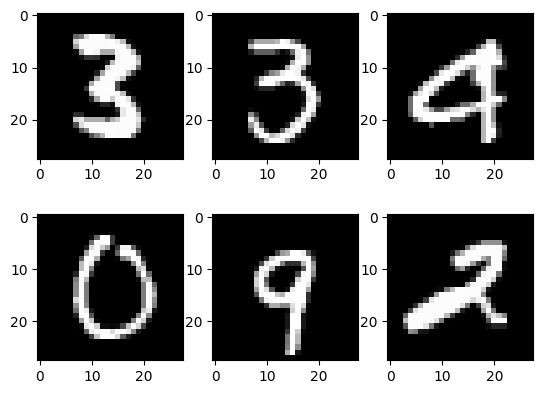

In [ ]:
#MNIST
#DataLoader,Transforomation
#Multilayer,Neural Net,activation function
#Loss and Optimizer
#Training Loop(batch training)
#Model evaluation
#GPU Support


import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size=784 # 28x28
hidden_size=100
num_classes=10
num_epochs=2
batch_size=100
learning_rate=0.001

#MNIST
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,
        transform=transforms.ToTensor(),download=True)

test_dataset=torchvision.datasets.MNIST(root='./data',train=False,
        transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,
                              shuffle=True)

test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,
                              shuffle=False)

examples=iter(train_loader)
samples,labels=next(examples)
print(samples.shape,labels.shape)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')



In [ ]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)

    return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(input_size, hidden_size, num_classes).to(device)



#loss and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

#training loop
n_total_steps=len(train_loader)
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    #100, 1, 28 ,28
    #100, 784
    images= images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    #forward
    outputs=model(images)
    loss=criterion(outputs,labels)

    #backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if(i+1)% 100 ==0:
      print(f'epoch {epoch+1}/{num_epochs},step {i+1}/{n_total_steps},loss={loss.item():.4f}')

#test
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images,labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(images)

    _,predictions=torch.max(outputs,1)
    n_samples+=labels.shape[0]
    n_correct+=(predictions==labels).sum().item()

  acc=100.0*n_correct/n_samples
  print(f'accuracy={acc}')




epoch 1/2,step 100/600,loss=0.4868
epoch 1/2,step 200/600,loss=0.3508
epoch 1/2,step 300/600,loss=0.2997
epoch 1/2,step 400/600,loss=0.2583
epoch 1/2,step 500/600,loss=0.2403
epoch 1/2,step 600/600,loss=0.1704
epoch 2/2,step 100/600,loss=0.2140
epoch 2/2,step 200/600,loss=0.1989
epoch 2/2,step 300/600,loss=0.1574
epoch 2/2,step 400/600,loss=0.1268
epoch 2/2,step 500/600,loss=0.1072
epoch 2/2,step 600/600,loss=0.2633
accuracy=95.39


In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms

# 1) Download MNIST and apply transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

full_train_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

# 2) Decide on split sizes (e.g., 90% train, 10% val)
train_size = int(0.9 * len(full_train_dataset))   # e.g., 54000 out of 60000
val_size   = len(full_train_dataset) - train_size # e.g., 6000

train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# 3) Create DataLoaders
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=2)

# 4) (Optional) Create a separate test_loader if you want to evaluate on the official test split
test_dataset = torchvision.datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


Epoch [1/10]  Train Loss: 0.2743, Train Acc: 0.9207  Val Loss: 0.1434, Val Acc: 0.9600
Epoch [2/10]  Train Loss: 0.1202, Train Acc: 0.9639  Val Loss: 0.1105, Val Acc: 0.9673
Epoch [3/10]  Train Loss: 0.0817, Train Acc: 0.9743  Val Loss: 0.1075, Val Acc: 0.9687
Epoch [4/10]  Train Loss: 0.0627, Train Acc: 0.9797  Val Loss: 0.0924, Val Acc: 0.9712
Epoch [5/10]  Train Loss: 0.0488, Train Acc: 0.9843  Val Loss: 0.0817, Val Acc: 0.9755
Epoch [6/10]  Train Loss: 0.0387, Train Acc: 0.9880  Val Loss: 0.0978, Val Acc: 0.9732
Epoch [7/10]  Train Loss: 0.0336, Train Acc: 0.9889  Val Loss: 0.0883, Val Acc: 0.9765
Epoch [8/10]  Train Loss: 0.0279, Train Acc: 0.9907  Val Loss: 0.1111, Val Acc: 0.9717
Epoch [9/10]  Train Loss: 0.0245, Train Acc: 0.9919  Val Loss: 0.0855, Val Acc: 0.9798
Epoch [10/10]  Train Loss: 0.0176, Train Acc: 0.9943  Val Loss: 0.0940, Val Acc: 0.9763


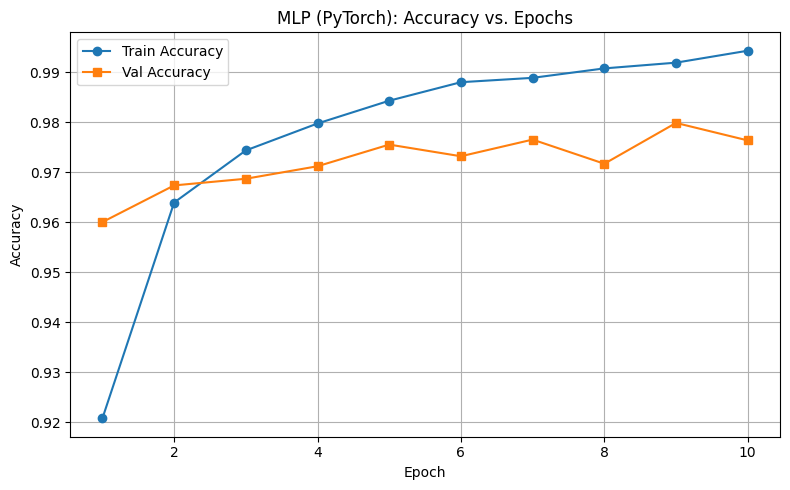

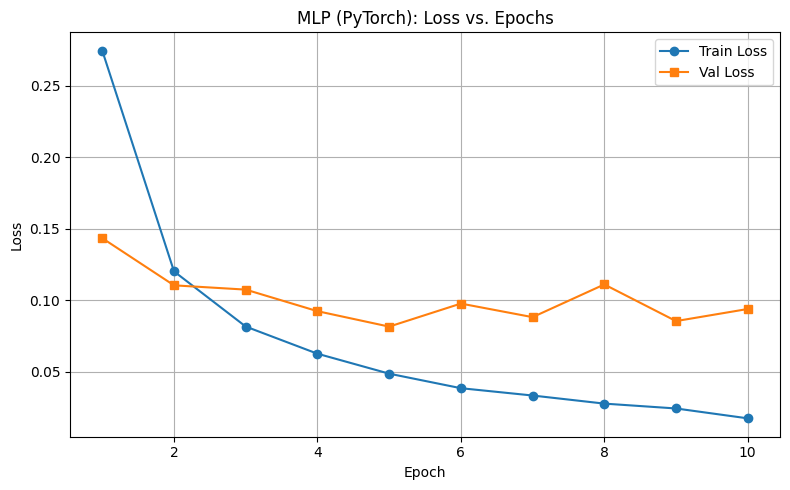

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms

# 1) Prepare MNIST train/val loaders (90/10 split).
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
full_train = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
train_size = int(0.9 * len(full_train))      # 54000
val_size   = len(full_train) - train_size    # 6000
train_ds, val_ds = random_split(full_train, [train_size, val_size])

batch_size = 64
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True,  num_workers=2)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, num_workers=2)

# 2) Define device, model, loss, optimizer.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = nn.Sequential(
    nn.Flatten(),            # flatten 28×28→784
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3) Set number of epochs to something >2 (e.g., 10).
num_epochs = 10

# Initialize histories
train_loss_history = []
train_acc_history  = []
val_loss_history   = []
val_acc_history    = []

# 4) Training + validation loops
for epoch in range(1, num_epochs + 1):
    # ---- Training phase ----
    model.train()
    running_train_loss = 0.0
    train_correct = 0
    train_total   = 0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)    # Flatten happens inside the model
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * X_batch.size(0)
        _, preds = torch.max(outputs, dim=1)
        train_correct += (preds == y_batch).sum().item()
        train_total   += y_batch.size(0)

    avg_train_loss = running_train_loss / train_total
    train_acc = train_correct / train_total
    train_loss_history.append(avg_train_loss)
    train_acc_history.append(train_acc)

    # ---- Validation phase ----
    model.eval()
    running_val_loss = 0.0
    val_correct = 0
    val_total   = 0

    with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val = X_val.to(device)
            y_val = y_val.to(device)

            outputs_val = model(X_val)
            loss_val = criterion(outputs_val, y_val)

            running_val_loss += loss_val.item() * X_val.size(0)
            _, preds_val = torch.max(outputs_val, dim=1)
            val_correct += (preds_val == y_val).sum().item()
            val_total   += y_val.size(0)

    avg_val_loss = running_val_loss / val_total
    val_acc = val_correct / val_total
    val_loss_history.append(avg_val_loss)
    val_acc_history.append(val_acc)

    print(
        f"Epoch [{epoch}/{num_epochs}]  "
        f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.4f}  "
        f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.4f}"
    )

# 5) After loop, you should see 10 printouts—one per epoch.

# 6) Plot the histories:
epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs_range, train_acc_history, marker='o', label="Train Accuracy")
plt.plot(epochs_range, val_acc_history,   marker='s', label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("MLP (PyTorch): Accuracy vs. Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("mlp_pytorch_accuracy.png")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(epochs_range, train_loss_history, marker='o', label="Train Loss")
plt.plot(epochs_range, val_loss_history,   marker='s', label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MLP (PyTorch): Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("mlp_pytorch_loss.png")
plt.show()
